In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:/PRML assignment 2/Assignment-2/Dataset/A2Q2Datatrain.csv',header=None)

In [3]:
X = pd.DataFrame(data,columns=data.columns[0:100])
Y = pd.DataFrame(data,columns=data.columns[100:])

In [5]:
XT=X.T
temp = XT.dot(X)
temp1 = np.linalg.inv(temp)
temp2=temp1.dot(XT)
W = temp2.dot(Y)

In [36]:
def calculate_norm(w1,W):
    temp=np.linalg.norm(w1-W)
    return temp

In [6]:
def update_param(x,y,learning_rate,w_gradient,b_gradient,k):
    x=y-learning_rate*(w_gradient/k)
    y=y-learning_rate*(w_gradient/k)
    return x,y

In [7]:
m,n=np.shape(X)

In [45]:
def do_prediction(w,x,b):
    temp=w@x
    temp=temp+b
    return temp

In [48]:
def calculate_wgradient(x,y,p,w):
    temp=-2*(x*(y-p))
    w=w+temp
    return w

In [51]:
def calculate_bgradient(y,p,w):
    temp=-2*((y-p))
    w=w+temp
    return w

In [52]:
w=np.zeros((1,n))
bias=0
t=200
learning_rate=0.0008
XX=np.zeros((t,1))
YY=np.zeros((t,1))
k=100
for i in range(t):
    temp=data.sample(k)
    x1=pd.DataFrame(temp,columns=temp.columns[0:100])
    y1=pd.DataFrame(temp,columns=temp.columns[100:])
    temp=np.array(temp)
    x1=np.array(x1)
    y1=np.array(y1)
    w_gradient=np.zeros((n,1))
    b_gradient=0
    for j in range(k):
        x1[j]=np.array(x1[j])
        p=do_prediction(w,x1[j],bias)
        w_gradient=calculate_wgradient(x1[j],y1[j],p,w_gradient)
        b_gradient=calculate_bgradient(y1[j],p,b_gradient)
    result=calculate_norm(w,W)
    w,bias=update_param(w,bias,learning_rate,w_gradient,b_gradient,k)
    XX[i]=result
    YY[i]=i

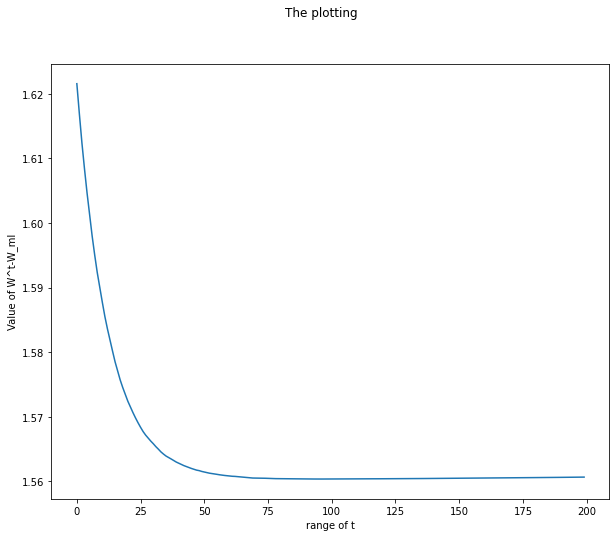

In [53]:
plt.figure(figsize=(10,8))
plt.plot(YY,XX/10)
plt.ylabel('Value of W^t-W_ml')
plt.xlabel('range of t')
plt.suptitle('The plotting')
plt.show()